# 0. Create Quarto YAML Cell and Import Libraries

The cell given above must go at the very top of your Notebook, even before the title!  Be sure to include the `---` on the first and last lines.  No other content should go in this raw cell!  This is what it should look like:

```

---
title: "Encoding Music Sample Homework Project"
author: 'Richard Freedman'
date: 'June 25, 2024'

format:
  html:
    code-fold: true
    embed-resources: true
plotly-connected: true
jupyter: python3

---
```

##  Now the Title, Your Name, and Date:

You can use markdown to control the size and look of this information:

```
Music 255:  Encoding Music
My First Homework Project
Richard Freedman
September 2, 2024
```

And now the **Import** statements, where you load the relevant libraries.  

Note that the last to items (for Quarto and Warnings) are especially important.

In [3]:
# import libraries 
# do not change this cell!


from community import community_louvain
from copy import deepcopy
from IPython.display import SVG
import altair as alt
import glob as glob
import numpy as np
import os
import pandas as pd
import re
import networkx as nx
from pyvis import network as net
from pyvis.network import Network 

import plotly.express as px
import requests
from itertools import combinations
from collections import Counter


# setup plotting for quarto
alt.renderers.enable('default')
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Motivation

* What is your point of inquiry? What are you trying discover? What do you expect to find? 
* What specific musical repertories are involved, and why do they matter in this context? 

**Some questions you might consider:**

* How do the 'observed' genres in the Belgrade/Billboard data relate to Spotify data?  Is genre more than sound?
* Conversely, are there songs that 'sound' alike in terms of Spotify features but are very different in terms of genre?
* How did the Beatles' music change over time?  With respect to genres?  Audio features?
* How did individual songwriters change over time?
* In a given album, which songs are most like each other?  Most unlike each other?  Which are 'outliers'?
* What do popular songs have in common with each other?

# 2. Implementation

How did you put your query into practice? What did you need to do with or to your data along the way?

* **What logical steps did you follow** as you thought about getting there (expressed in pseudo code; perhaps in bullet-point form in your markdown cell)?
* **Which tools (or methods) did you select**, and why were they right for the job?
If you chose to create some kind of visualization (a chart, network or map), how did you decide on the right representation for the task at hand?
* **What challenges did you face** as you worked to put the steps into action in code? Did you need to clean or tidy your data? Filter, sort, or group it in some way?


Remember to use **verbatim code** or **block code** to show your work as needed. [Learn how at Adam's Tutorial](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code).  For example:

```python
hits = beatles_combined[beatles_combined['top.50.billboard'] > 20].reset_index()
```

Remember to **add comments to your code** to show the most important steps.


**Note**:  Your code cells and their outputs go below. 

When you 'render' this with **Quarto** (see [instructions here](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/01_Notebook_Introduction_Quarto.md#Export-and-Publish-with-Quarto)) the code will be 'hidden' behind a dropdown arrow.  The output will be rendered in HTML.

In [4]:
# add code and markdown cells as needed 

# 3. Load the Clean and Tidy Data


In [5]:
# get the data from your local folder!

beatles_data = pd.read_pickle('beatles_data.pkl')
len(beatles_data)

299

In [6]:

# list the columns in our data
beatles_data.columns.to_list()

['title',
 'album',
 'year',
 'spotify_id',
 'songwriter',
 'lead_vocal',
 'genre',
 'billboard_weeks',
 'danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'loudness',
 'mode',
 'key',
 'tempo',
 'duration_ms',
 'time_signature',
 'song_count']

# 4. Filter and Group

## 4a. Filter Your Data

Now let's filter the data according to some criteria that will return a 'slice' of the full set.  The subset you return will depend on your particular interests:  

* a particular album
* songs by a particular writer (or writers)
* songs from a particular year
* songs representing a particular genre
* 'hit' songs (or ones that are NOT hits!)

Learn more at [Encoding Music Tutorial!](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/07_Pandas_Filter_Find_Group.md#a-basic-filter)

In [7]:
# here is the code to filter the dataframe for a single album title
# notice that we give the result a new name--we did NOT change the original!

abbey_road = beatles_data[(beatles_data['genre'] == 'psychedelic rock')].reset_index(drop=True).copy()
abbey_road.head()

,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,energy,...,instrumentalness,liveness,valence,loudness,mode,key,tempo,duration_ms,time_signature,song_count
0,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,psychedelic rock,0,0.364,0.457,...,0.000106,0.9220,0.1750,-14.162,0,4,163.219,337413,4,1
1,blue jay way,Magical Mystery Tour,1967,0QIX9BS0AUCQcHYvyrsMkV,Harrison,Harrison,psychedelic rock,0,0.294,0.407,...,0.000219,0.0852,0.0378,-11.575,1,0,101.052,235067,4,1
2,doctor robert,Revolver,1966,1ob06Ol8FMIPQgjpg7bMyk,"Lennon, with McCartney",Lennon,psychedelic rock,0,0.394,0.640,...,0.139000,0.1530,0.5740,-8.992,1,4,164.626,134267,4,1
3,flying,Magical Mystery Tour,1967,1itLKsCWHtLnxALkgBk1Fa,"Lennon, McCartney, Harrison and Starkey",instrumental,psychedelic rock,0,0.551,0.395,...,0.880000,0.0932,0.2610,-14.755,1,0,92.929,135520,4,1
4,getting better,Sgt. Pepper's Lonely Hearts Club Band,1967,3LtOmWpTXLhilL5odoKysR,"McCartney, with Lennon",McCartney,psychedelic rock,0,0.632,0.471,...,0.000005,0.0712,0.7640,-7.887,1,0,121.672,168120,4,1


In [8]:
# notice that you can also *reverse* the Boolean test, and return all the rows that are NOT Abbey Road!
# here we surround the original test with '( )' and add '~'

not_abbey_road = beatles_data[~(beatles_data['album'] == 'Abbey Road')].reset_index(drop=True).copy()
not_abbey_road.head()

,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,energy,...,instrumentalness,liveness,valence,loudness,mode,key,tempo,duration_ms,time_signature,song_count
0,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,psychedelic rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
1,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,art rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
2,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,pop rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
3,a hard day's night,A Hard Day's Night,1964,5J2CHimS7dWYMImCHkEFaJ,Lennon,"Lennon, with McCartney",rock,8,0.590,0.805,...,0.000000,0.0996,0.797,-6.481,1,0,138.514,154200,4,1
4,a hard day's night,A Hard Day's Night,1964,5J2CHimS7dWYMImCHkEFaJ,Lennon,"Lennon, with McCartney",electronic,8,0.590,0.805,...,0.000000,0.0996,0.797,-6.481,1,0,138.514,154200,4,1


In [9]:
# filter for certain years

late_sixties_songs = beatles_data[beatles_data['year'] > 1966].reset_index(drop=True).copy()
late_sixties_songs.head()


,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,energy,...,instrumentalness,liveness,valence,loudness,mode,key,tempo,duration_ms,time_signature,song_count
0,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,psychedelic rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
1,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,art rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
2,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,pop rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
3,across the universe,Let It Be,1970,4dkoqJrP0L8FXftrMZongF,Lennon,Lennon,psychedelic folk,0,0.257,0.412,...,0.000087,0.0702,0.858,-11.788,1,1,152.126,228133,4,1
4,across the universe,Let It Be,1970,4dkoqJrP0L8FXftrMZongF,Lennon,Lennon,pop rock,0,0.257,0.412,...,0.000087,0.0702,0.858,-11.788,1,1,152.126,228133,4,1


In [8]:
late_hits = beatles_data[(beatles_data['year'] > 1966) | (beatles_data['billboard_weeks'] > 20)].reset_index(drop=True).copy()
late_hits.head()

,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,energy,...,instrumentalness,liveness,valence,loudness,mode,key,tempo,duration_ms,time_signature,song_count
0,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,psychedelic rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
1,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,art rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
2,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,pop rock,0,0.364,0.457,...,0.000106,0.9220,0.175,-14.162,0,4,163.219,337413,4,1
3,across the universe,Let It Be,1970,4dkoqJrP0L8FXftrMZongF,Lennon,Lennon,psychedelic folk,0,0.257,0.412,...,0.000087,0.0702,0.858,-11.788,1,1,152.126,228133,4,1
4,across the universe,Let It Be,1970,4dkoqJrP0L8FXftrMZongF,Lennon,Lennon,pop rock,0,0.257,0.412,...,0.000087,0.0702,0.858,-11.788,1,1,152.126,228133,4,1


In [12]:
beatles_data['songwriter'].unique().tolist()

['Lennon and McCartney',
 'Lennon',
 'Russell, Morrison',
 'McCartney',
 'McCartney, with Lennon',
 'Lennon, with McCartney',
 'Bacharach, David, Dixon',
 'Harrison',
 'Dixon, Farrell',
 'Goffin, King',
 'Drapkin (aka Ricky Dee)',
 'Lennon, with McCartney, Harrison and Starkey',
 'Lennon, McCartney, Harrison and Starkey',
 'Lennon with McCartney',
 'Traditional, arr. Lennon, McCartney, Harrison, Starkey',
 'Starkey, with uncredited assistance from Harrison',
 'Lennon, with Ono and Harrison',
 'Berry',
 'Harrison, with uncredited contribution from Lennon',
 'Willson',
 'Medley, Russell',
 'Lennon and McCartney, with Starkey',
 'Holly']

In [15]:
lennon_mccartney = beatles_data[(beatles_data['songwriter'] == 'Lennon') | (beatles_data['songwriter'] == 'McCartney')].reset_index(drop=True).copy()


songwriter
McCartney    91
Lennon       65
Name: count, dtype: int64

In [25]:
# group according to the values in a particular column
grouped = beatles_data.groupby(['album'])

# # look at just ONE grop--it's just like filtering the full df for the given value
grouped.get_group('Help!')

# # and then we could apply some method to that 'slice'

grouped.get_group('Help!')['genre'].value_counts()

genre
pop rock               8
folk rock              2
country                1
country rock           1
rock                   1
electronic pop rock    1
power pop              1
jangle pop             1
baroque pop            1
Name: count, dtype: int64

In [22]:
# group according to the values in a particular column
# Count unique titles per songwriter
unique_titles_per_songwriter = beatles_data.groupby('songwriter')['title'].nunique()
unique_titles_per_songwriter

songwriter
Bacharach, David, Dixon                                    1
Berry                                                      2
Dixon, Farrell                                             1
Drapkin (aka Ricky Dee)                                    1
Goffin, King                                               1
Harrison                                                  15
Harrison, with uncredited contribution from Lennon         1
Holly                                                      1
Lennon                                                    30
Lennon and McCartney                                       6
Lennon and McCartney, with Starkey                         1
Lennon with McCartney                                      1
Lennon, McCartney, Harrison and Starkey                    1
Lennon, with McCartney                                     8
Lennon, with McCartney, Harrison and Starkey               1
Lennon, with Ono and Harrison                              1
McCartney    

In [26]:
# group according to the values in a particular column
# Count unique titles per songwriter
unique_titles_lennon_mccartney = lennon_mccartney.groupby('songwriter')['title'].nunique()
unique_titles_lennon_mccartney

songwriter
Lennon       30
McCartney    34
Name: title, dtype: int64

In [32]:
lennon_mccartney

,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,energy,...,instrumentalness,liveness,valence,loudness,mode,key,tempo,duration_ms,time_signature,song_count
0,a hard day's night,A Hard Day's Night,1964,5J2CHimS7dWYMImCHkEFaJ,Lennon,"Lennon, with McCartney",rock,8,0.590,0.805,...,0.000000,0.0996,0.797,-6.481,1,0,138.514,154200,4,1
1,a hard day's night,A Hard Day's Night,1964,5J2CHimS7dWYMImCHkEFaJ,Lennon,"Lennon, with McCartney",electronic,8,0.590,0.805,...,0.000000,0.0996,0.797,-6.481,1,0,138.514,154200,4,1
2,a hard day's night,A Hard Day's Night,1964,5J2CHimS7dWYMImCHkEFaJ,Lennon,"Lennon, with McCartney",pop rock,8,0.590,0.805,...,0.000000,0.0996,0.797,-6.481,1,0,138.514,154200,4,1
3,across the universe,Let It Be,1970,4dkoqJrP0L8FXftrMZongF,Lennon,Lennon,psychedelic folk,0,0.257,0.412,...,0.000087,0.0702,0.858,-11.788,1,1,152.126,228133,4,1
4,across the universe,Let It Be,1970,4dkoqJrP0L8FXftrMZongF,Lennon,Lennon,pop rock,0,0.257,0.412,...,0.000087,0.0702,0.858,-11.788,1,1,152.126,228133,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,you never give me your money,Abbey Road,1969,1jOLTO379yIu9aMnCkpMQl,McCartney,McCartney,pop rock,0,0.335,0.416,...,0.136000,0.1160,0.223,-11.051,1,0,174.464,242973,3,1
152,your mother should know,Magical Mystery Tour,1967,1dxbAIfCASqv6jix2R1Taj,McCartney,McCartney,music hall,0,0.698,0.293,...,0.010600,0.0936,0.724,-11.361,1,0,117.613,148413,4,1
153,your mother should know,Magical Mystery Tour,1967,1dxbAIfCASqv6jix2R1Taj,McCartney,McCartney,vaudeville rock,0,0.698,0.293,...,0.010600,0.0936,0.724,-11.361,1,0,117.613,148413,4,1
154,your mother should know,Magical Mystery Tour,1967,1dxbAIfCASqv6jix2R1Taj,McCartney,McCartney,psychedelic pop,0,0.698,0.293,...,0.010600,0.0936,0.724,-11.361,1,0,117.613,148413,4,1


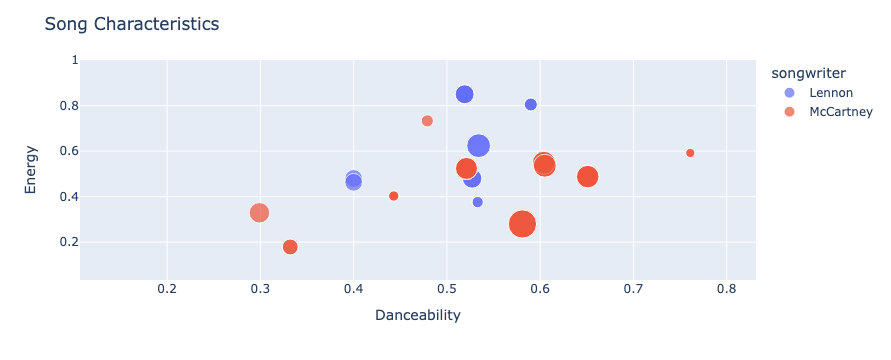

In [33]:
fig = px.scatter(lennon_mccartney, 
                x='danceability', 
                y='energy',
                color='songwriter',
                size='billboard_weeks',
                hover_name='title',
                hover_data={
                    'danceability': ':.3f',
                    'energy': ':.3f',
                    'songwriter': True
                })

# Customize the plot
fig.update_layout(
    title='Song Characteristics',
    xaxis_title='Danceability',
    yaxis_title='Energy'
)

# Show the plot
fig.show()

In [ ]:
lennon_mccartney

In [9]:
late_hits['genre'].unique().tolist()

['psychedelic rock',
 'art rock',
 'pop rock',
 'psychedelic folk',
 'country',
 'skiffle',
 'hard rock',
 'rock',
 'folk',
 'symphonic rock',
 'blues rock',
 'baroque pop',
 'psychedelic pop',
 'instrumental rock',
 'space rock',
 'country blues',
 'blues',
 'orchestral pop',
 'lullaby',
 'rhythm and blues',
 'jazz fusion',
 'heavy metal',
 'proto-punk',
 'music hall',
 'jazz',
 'ragtime',
 'acid rock',
 'experimental rock',
 'folk blues',
 'gospel',
 'folk rock',
 'swamp pop',
 'roots rock',
 'merseybeat',
 'progressive pop',
 'avant-garde',
 'musique concrete',
 'experimental',
 'sound collage',
 'soul',
 'art pop',
 'experimental pop',
 'lo-fi',
 'indian classical',
 'raga rock',
 "children's",
 'vaudeville rock']

In [10]:
# filter for 'top hits'

hits = beatles_data[beatles_data['billboard_weeks'] > 20].reset_index().copy()
# here you can get just the titles, so you could do something else with them!
hits['title'].unique().tolist()


['act naturally',
 'and i love her',
 'eight days a week',
 'eleanor rigby',
 'got to get you into my life',
 'i saw her standing there',
 'nowhere man',
 'p.s. i love you',
 'penny lane',
 'something',
 'yellow submarine']

In [11]:
# certain words or even characters as substrings;  good for matching.
# these could be _anywhere_ in the given column!

psychedelic = beatles_data[beatles_data['genre'].str.contains('psych')].reset_index().copy()
psychedelic.head()


,index,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,...,instrumentalness,liveness,valence,loudness,mode,key,tempo,duration_ms,time_signature,song_count
0,0,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,psychedelic rock,0,0.364,...,0.000106,0.9220,0.1750,-14.162,0,4,163.219,337413,4,1
1,6,across the universe,Let It Be,1970,4dkoqJrP0L8FXftrMZongF,Lennon,Lennon,psychedelic folk,0,0.257,...,0.000087,0.0702,0.8580,-11.788,1,1,152.126,228133,4,1
2,18,and your bird can sing,Revolver,1966,4KRgqwb4kvBuTz1utbYxfb,"Lennon, with McCartney",Lennon,psychedelic pop,0,0.555,...,0.049100,0.2360,0.9660,-6.936,1,4,132.59,120493,4,1
3,31,blue jay way,Magical Mystery Tour,1967,0QIX9BS0AUCQcHYvyrsMkV,Harrison,Harrison,psychedelic rock,0,0.294,...,0.000219,0.0852,0.0378,-11.575,1,0,101.052,235067,4,1
4,50,doctor robert,Revolver,1966,1ob06Ol8FMIPQgjpg7bMyk,"Lennon, with McCartney",Lennon,psychedelic rock,0,0.394,...,0.139000,0.1530,0.5740,-8.992,1,4,164.626,134267,4,1


#### From these filtered views we can derive other information:

In [12]:
# here we count the number of each sub-genre
psychedelic['genre'].value_counts()

genre
psychedelic rock    17
psychedelic pop      5
psychedelic folk     3
Name: count, dtype: int64

In [13]:
# or counts of years
psychedelic['year'].value_counts()

year
1967    13
1966     6
1968     3
1969     2
1970     1
Name: count, dtype: int64

#### Filter for a LIST of COMPLETE strings

Such as a list of albums, or years, or genres.

The formula to use:

`isin(['full string 1', 'full string 2'])`

It will NOT match substrings (like 'psych').  For that, we use `str.contains('psych')` (see above).

In [14]:



psychedelic_rock_pop = beatles_data[beatles_data['genre'].isin(['psychedelic rock', 'psychedlic pop'])].reset_index().copy()
psychedelic_rock_pop.head()

,index,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,...,instrumentalness,liveness,valence,loudness,mode,key,tempo,duration_ms,time_signature,song_count
0,0,a day in the life,Sgt. Pepper's Lonely Hearts Club Band,1967,"0hKRSZhUGEhKU6aNSPBACZ""",Lennon and McCartney,Lennon and McCartney,psychedelic rock,0,0.364,...,0.000106,0.9220,0.1750,-14.162,0,4,163.219,337413,4,1
1,31,blue jay way,Magical Mystery Tour,1967,0QIX9BS0AUCQcHYvyrsMkV,Harrison,Harrison,psychedelic rock,0,0.294,...,0.000219,0.0852,0.0378,-11.575,1,0,101.052,235067,4,1
2,50,doctor robert,Revolver,1966,1ob06Ol8FMIPQgjpg7bMyk,"Lennon, with McCartney",Lennon,psychedelic rock,0,0.394,...,0.139000,0.1530,0.5740,-8.992,1,4,164.626,134267,4,1
3,66,flying,Magical Mystery Tour,1967,1itLKsCWHtLnxALkgBk1Fa,"Lennon, McCartney, Harrison and Starkey",instrumental,psychedelic rock,0,0.551,...,0.880000,0.0932,0.2610,-14.755,1,0,92.929,135520,4,1
4,77,getting better,Sgt. Pepper's Lonely Hearts Club Band,1967,3LtOmWpTXLhilL5odoKysR,"McCartney, with Lennon",McCartney,psychedelic rock,0,0.632,...,0.000005,0.0712,0.7640,-7.887,1,0,121.672,168120,4,1


In [15]:
# distribution of genres in a single album

mystery_tour = beatles_data[beatles_data['album'].isin(['Magical Mystery Tour'])].reset_index().copy()

mystery_tour['genre'].value_counts()


genre
pop rock             10
psychedelic rock      5
baroque pop           2
psychedelic pop       2
instrumental rock     1
space rock            1
acid rock             1
experimental rock     1
progressive pop       1
music hall            1
vaudeville rock       1
Name: count, dtype: int64

## 4b. Group Your Data

Groupby operations are an important part of Pandas.  They allow us, for instance, to find:

* the 'average' Spotify values for each album
* a list of genres for each album
* a list of songs associated with each genre

etc

Learn more at [Encoding Music Tutorial!](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/07_Pandas_Filter_Find_Group.md#groupby-functions)

#### Why Groupby?

What if we wanted to see the distribution of genres across all albums?  We could go make a list of albums and then return `value_counts()` for each `genre` column.  It would involve an elaborate `for` loop to album title

```python
list_dfs = []
for album in album_list:
    this_album = beatles_data['album'] == album
    genre_counts = this_album['genres'].value_counts()
    list_dfs.append(genre_counts)
genre_report = pd.DataFrame.merge(list_dfs)
```

But that would be tedious!  `Groupby` will solve this quickly!





In [16]:

# group according to the values in a particular column
grouped = beatles_data.groupby(['album'])

# look at just ONE grop--it's just like filtering the full df for the given value
grouped.get_group('Help!')

# and then we could apply some method to that 'slice'

grouped.get_group('Help!')['genre'].value_counts()

genre
pop rock               8
folk rock              2
country                1
country rock           1
rock                   1
electronic pop rock    1
power pop              1
jangle pop             1
baroque pop            1
Name: count, dtype: int64

In [17]:
# but the full groupby operation does that for EVERY album automatically, 
# and returns the results so that we can make a new DF with them:

album_genres = pd.DataFrame(beatles_data.groupby(['album'])['genre'].value_counts()).reset_index()
album_genres

,album,genre,count
0,A Hard Day's Night,pop rock,8
1,A Hard Day's Night,rock,4
2,A Hard Day's Night,electronic,1
3,Abbey Road,pop rock,12
4,Abbey Road,rock,4
...,...,...,...
118,With The Beatles,rock & roll,1
119,Yellow Submarine,pop rock,3
120,Yellow Submarine,psychedelic rock,2
121,Yellow Submarine,hard rock,1


## 4c. From Numerical to Categorical Data


Sometimes numerical data is "too refined" for our needs.  

Instead for instance we might want to turn the 'scalar' Spotify audio features into 'categorical' labels--songs that are either 'danceable' (values above .50). Or perhaps we want 'low', 'medium', and 'high' valence songs.

Pandas and Python have built-in `cut` and `qcut` methods that do this for us!

We can take a range of values and then 'cut' them into bins in different ways.  We can even label them for further work.

Learn more via [Encoding Music Tutorials!](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/07_Pandas_Filter_Find_Group.md#bins--from-continuous-to-categorical-data)

In [18]:
# below we use the pandas "cut" method to split the data into 'bins' of similar values
# notice that the bins have different numbers of songs in them!  
# This is because the 'cut' is looking to make "ranges" that are equal!

# my preferred cols as a list
column_list = ['danceability', 'energy', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness']
# loop over the columns and 'cut' the data to see
for col in column_list:
    # show the 'binned' values for each feature column
    print(pd.cut(beatles_data[col], bins=4).value_counts())


danceability
(0.513, 0.696]    141
(0.33, 0.513]      87
(0.696, 0.88]      37
(0.145, 0.33]      34
Name: count, dtype: int64
energy
(0.517, 0.728]     107
(0.306, 0.517]      96
(0.728, 0.939]      59
(0.0945, 0.306]     35
Name: count, dtype: int64
acousticness
(-0.000862, 0.234]    126
(0.234, 0.468]         78
(0.468, 0.702]         48
(0.702, 0.936]         47
Name: count, dtype: int64
valence
(0.738, 0.971]     117
(0.504, 0.738]     102
(0.0369, 0.271]     42
(0.271, 0.504]      38
Name: count, dtype: int64
speechiness
(0.0244, 0.104]    289
(0.263, 0.342]       5
(0.183, 0.263]       3
(0.104, 0.183]       2
Name: count, dtype: int64
liveness
(0.0405, 0.262]    209
(0.262, 0.482]      46
(0.702, 0.922]      23
(0.482, 0.702]      21
Name: count, dtype: int64
instrumentalness
(-0.00088, 0.22]    264
(0.66, 0.88]         16
(0.22, 0.44]         10
(0.44, 0.66]          9
Name: count, dtype: int64


In [19]:
# below I use the pandas "qcut" method to split the data into 'equally sized' bins

# my preferred cols as a list
column_list = ['danceability', 'energy', 'acousticness', 'valence']
# loop over the columns and 'cut' the data to see
for col in column_list:
    # show the 'binned' values for each feature column
    print(pd.qcut(beatles_data[col], q=4).value_counts())


danceability
(0.145, 0.419]    76
(0.419, 0.534]    75
(0.534, 0.61]     74
(0.61, 0.88]      74
Name: count, dtype: int64
energy
(0.0943, 0.445]    77
(0.445, 0.549]     74
(0.549, 0.678]     74
(0.678, 0.939]     72
Name: count, dtype: int64
acousticness
(-0.0009263, 0.0574]    75
(0.0574, 0.323]         75
(0.323, 0.587]          75
(0.587, 0.936]          74
Name: count, dtype: int64
valence
(0.0368, 0.49]    79
(0.801, 0.971]    74
(0.49, 0.688]     73
(0.688, 0.801]    73
Name: count, dtype: int64


In [20]:
labels = ['l', 'm', 'h', 's']

# Create binned columns with custom labels
for col in column_list:
    binned_col = f"{col}_binned"
    beatles_data[binned_col] = pd.qcut(beatles_data[col], q=4, labels=labels).astype(str)
    
# this results in new 'binned' columns that inherit the names of the original feature, such as 'danceability_binned', 'energy_binned', 'speechiness_binned'


In [21]:
beatles_data['valence_binned'].unique()

array(['l', 'h', 's', 'm'], dtype=object)

In [22]:
# now as an additional step we can 'combine' the labels in two or bins to make a kind of 'tag'
# some pieces might be 'high' in danceability and 'high' in valence. But the combinations are varied!

beatles_data['audio_feature_group'] = beatles_data['danceability_binned'] + "_" + beatles_data['valence_binned']

# keep only the first row for each song (they repeat following the 'explode' data step above
binned_song_counts = beatles_data.groupby('title').first().reset_index(drop=False).copy()

# group them by the 'multi-tags', album, and year, then get the count
binned_song_counts_grouped = binned_song_counts.groupby(['audio_feature_group', 'title', 'year'])['song_count'].sum().reset_index().copy()
#sort them by year
binned_song_counts_sort = binned_song_counts_grouped.sort_values(['year', 'title'])
binned_song_counts_sort.sample(5)

,audio_feature_group,title,year,song_count
121,s_s,girl,1965,1
55,l_m,i am the walrus,1967,1
112,s_m,good day sunshine,1966,1
71,m_h,think for yourself,1965,1
65,m_h,got to get you into my life,1966,1


In [23]:

# are there piece are highly danceable but with low valence?  What genres do they represent?

selected_songs = binned_song_counts_sort[binned_song_counts_sort['audio_feature_group'] == 'l_h'].copy()
selected_songs

,audio_feature_group,title,year,song_count
35,l_h,tell me why,1964,1
32,l_h,love you to,1966,1
34,l_h,revolution 1,1968,1
33,l_h,only a northern song,1969,1


In [24]:
# and what genres are associated with the 'not danceable but high valence'?

titles = selected_songs['title'].unique().tolist()

# now get the genres for just those songs from our original data:

filtered_data = beatles_data[beatles_data['title'].isin(titles)]
filtered_data['genre'].value_counts()

genre
pop rock            3
indian music        1
raga rock           1
psychedelic rock    1
hard rock           1
rock                1
Name: count, dtype: int64

In [25]:
# learn how to visualize the data below!

# 5. Chart and Plot Your Data

These include:

* Scatterplots
* Bar charts 
* Radar Plots

Note that in each case you might want to 'filter' the original data in some way in order to focus on a particular question!

Learn more about charts and graphs via [Encoding Music Tutorials!](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/08_Pandas_Graphs_and_Charts.md)

## 5a. Genres over Time

In [26]:
# as a reminder, here is our groupby from above:

genre_counts = beatles_data.groupby(['album', 'year', 'songwriter'
                                    ])['genre'].value_counts().reset_index()
genre_counts.head(5)

,album,year,songwriter,genre,count
0,A Hard Day's Night,1964,Lennon,pop rock,5
1,A Hard Day's Night,1964,Lennon,rock,3
2,A Hard Day's Night,1964,Lennon,electronic,1
3,A Hard Day's Night,1964,"Lennon, with McCartney",pop rock,1
4,A Hard Day's Night,1964,McCartney,pop rock,1


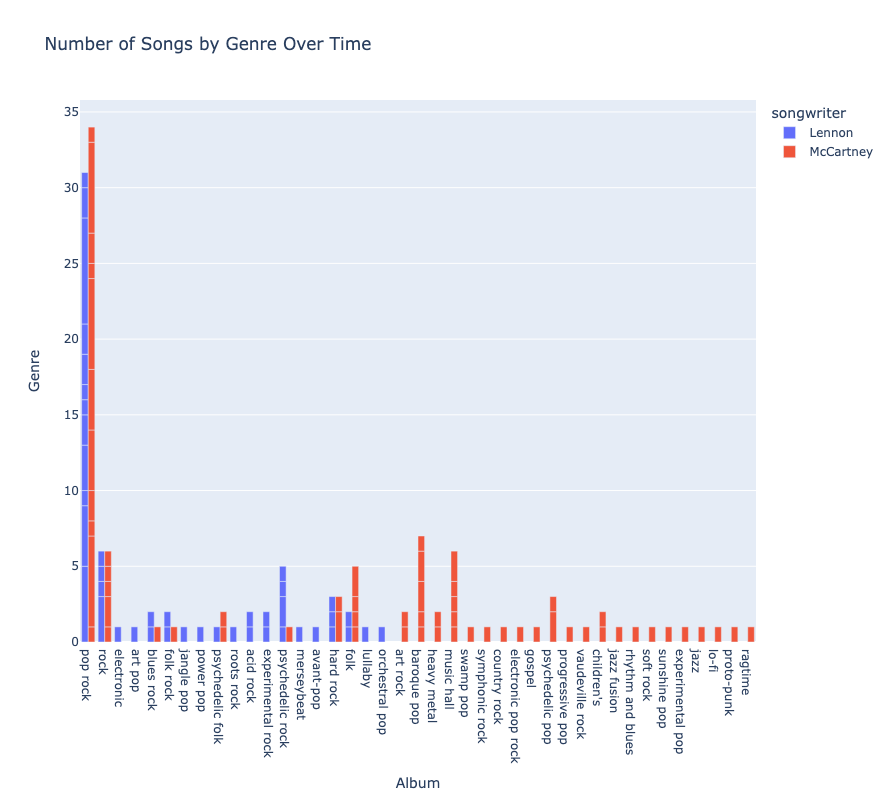

In [34]:

# here we look at genres over time, so we groupby on those columns, then count the number of songs

genre_counts = beatles_data.groupby(['album', 'year', 'songwriter'])['genre'].value_counts().reset_index()

lennon_mccartney = genre_counts[genre_counts['songwriter'].isin(['Lennon', 'McCartney'])].copy()


# Create the scatter plot
fig = px.bar(
    lennon_mccartney,
    x='genre',
    y='count',
    # size='count',
    color='songwriter',
    hover_data=['count'],
    barmode='group',
    labels={
        'x': 'Year',
        'y': 'Genre',
        'size': 'Number of Songs',
        'color': 'Genre'
    },
    title="Number of Songs by Genre Over Time"
)

# Customize the plot
fig.update_layout(
    xaxis_title="Album",
    yaxis_title="Genre",
    showlegend=True,

    width=800,  # Set width to 800px
    height=800,  # Set height to 800px
)

# Show the plot
fig.show()

In [53]:
lennon_mccartney


[0       True
 1       True
 2       True
 3      False
 4       True
        ...  
 222     True
 223     True
 224     True
 225    False
 226    False
 Name: songwriter, Length: 227, dtype: bool]

Of course you might want to 'filter' the data to see explore a particular question!

## 5b. Genres and Songwriters

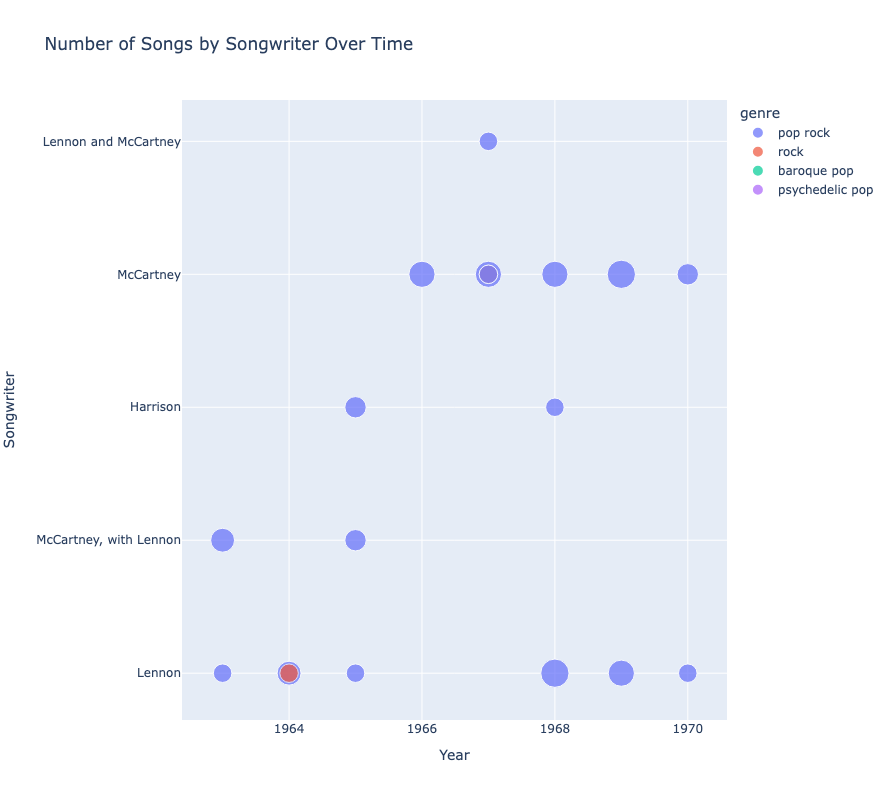

In [12]:
# now we look at the genres explored by different songwriters (or teams of songwriters).

# we also 'filter' the results to eliminate songs instances of just one song in the matching year/writer/genre category

author_counts = beatles_data.groupby(['year', 'songwriter', 'genre'])['song_count'].sum().reset_index()

# filter out 'unique' genres (or focus on them!)
author_counts = author_counts[author_counts['song_count'] >=3 ]

# Create the scatter plot
fig = px.scatter(
    author_counts,
    x='year',
    y='songwriter',
    size='song_count',
    color='genre',
    hover_data=['song_count'],
    labels={
        'x': 'Year',
        'y': 'Songwriter',
        'size': 'Number of Songs',
        'color': 'Genre'
    },
    title="Number of Songs by Songwriter Over Time"
)

# Customize the plot
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Songwriter",
    showlegend=True,
    width=800,  # Set width to 800px
    height=800,  # Set height to 800px
)

# Show the plot
fig.show()

## 5c. Spotify Data by Album


In [105]:
# mean values for selected Spotify features, by album

grouped_data = beatles_data.groupby(['year', "album"])[['danceability', 'energy', 'acousticness']].mean().copy()
grouped_data = grouped_data.reset_index()
grouped_data.style.set_caption("Table 1: Selected Mean Audio Feature Values for Beatles Albums").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '18px')
    ]
}])

,year,album,danceability,energy,acousticness
0,1963,Please Please Me,0.526957,0.672565,0.520435
1,1963,With The Beatles,0.519000,0.737625,0.375937
2,1964,A Hard Day's Night,0.559077,0.640846,0.367077
3,1964,Beatles for Sale,0.631667,0.633222,0.510556
4,1965,Help!,0.532059,0.634765,0.258382
5,1965,Rubber Soul,0.616435,0.586304,0.128223
6,1966,Revolver,0.483923,0.562462,0.365947
7,1967,Magical Mystery Tour,0.505840,0.433174,0.344232
8,1967,Sgt. Pepper's Lonely Hearts Club Band,0.494000,0.467316,0.265158
9,1968,The Beatles,0.473547,0.516728,0.415921


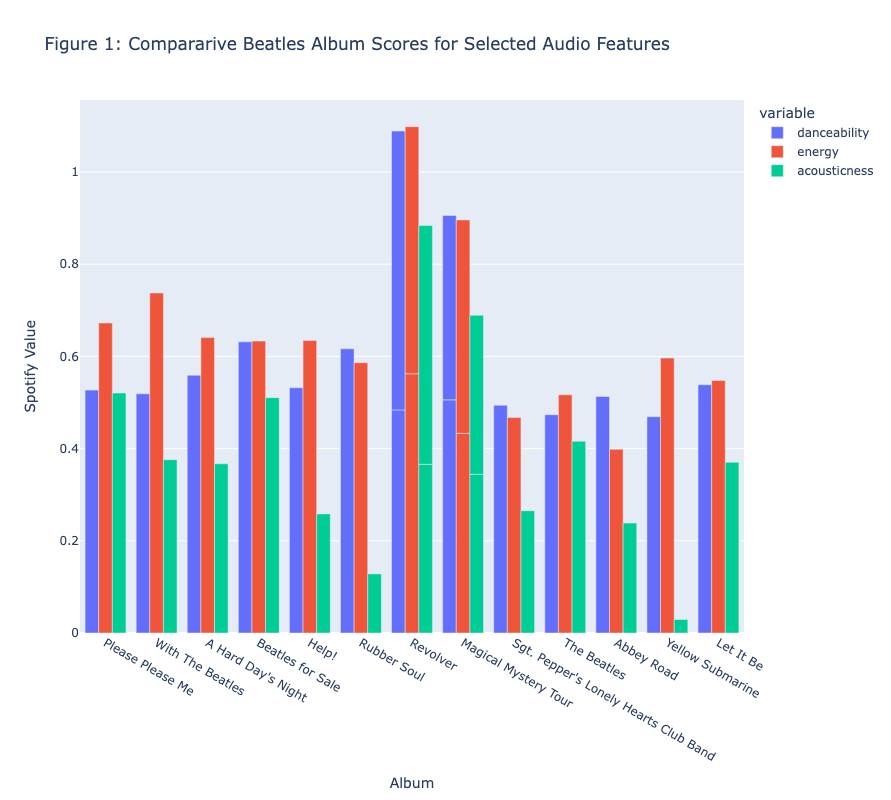

In [106]:
# now we create a barchart to show the same information graphically

fig = px.bar(grouped_data,
             x='album',
             y=['danceability', 'energy', 'acousticness'],
             labels={'danceability': 'Danceability', 'energy': 'Energy', 'acousticness': 'Acousticness'},
             title='Figure 1: Compararive Beatles Album Scores for Selected Audio Features')

# Update layout for better visualization
fig.update_layout(barmode='group', 
                  xaxis_title="Album",
                yaxis_title="Spotify Value",
                  width=800, 
                  height=800)

# Show the figure
fig.show()

## 5d. Spotify Data for Selected Songs

In [107]:
# filtering full dataset for just this album
rubber_soul = beatles_data[beatles_data['album'] == 'Rubber Soul'].copy()
rubber_soul

,title,album,year,spotify_id,songwriter,lead_vocal,genre,billboard_weeks,danceability,energy,...,key,tempo,duration_ms,time_signature,song_count,danceability_binned,energy_binned,acousticness_binned,valence_binned,audio_feature_group
53,drive my car,Rubber Soul,1965,06ypiqmILMdVeaiErMFA91,"McCartney, with Lennon","McCartney, with Lennon",rock,0,0.754,0.571,...,2,122.463,148893,4,1,s,h,l,s,s_s
54,drive my car,Rubber Soul,1965,06ypiqmILMdVeaiErMFA91,"McCartney, with Lennon","McCartney, with Lennon",rhythm and blues,0,0.754,0.571,...,2,122.463,148893,4,1,s,h,l,s,s_s
55,drive my car,Rubber Soul,1965,06ypiqmILMdVeaiErMFA91,"McCartney, with Lennon","McCartney, with Lennon",pop rock,0,0.754,0.571,...,2,122.463,148893,4,1,s,h,l,s,s_s
79,girl,Rubber Soul,1965,6tQvjqDIK9GXWIC6mejms8,Lennon,Lennon,folk,0,0.699,0.294,...,5,96.615,151720,4,1,s,l,h,s,s_s
80,girl,Rubber Soul,1965,6tQvjqDIK9GXWIC6mejms8,Lennon,Lennon,pop rock,0,0.699,0.294,...,5,96.615,151720,4,1,s,l,h,s,s_s
136,if i needed someone,Rubber Soul,1965,7C6hdDIz90Uf5YmdZnYbJJ,Harrison,Harrison,folk rock,0,0.492,0.755,...,9,127.387,142267,4,1,m,s,l,h,m_h
137,if i needed someone,Rubber Soul,1965,7C6hdDIz90Uf5YmdZnYbJJ,Harrison,Harrison,pop rock,0,0.492,0.755,...,9,127.387,142267,4,1,m,s,l,h,m_h
138,in my life,Rubber Soul,1965,3KfbEIOC7YIv90FIfNSZpo,Lennon and McCartney,Lennon,baroque pop,0,0.688,0.435,...,9,103.239,146333,4,1,s,l,h,l,s_l
139,in my life,Rubber Soul,1965,3KfbEIOC7YIv90FIfNSZpo,Lennon and McCartney,Lennon,pop rock,0,0.688,0.435,...,9,103.239,146333,4,1,s,l,h,l,s_l
163,michelle,Rubber Soul,1965,5By7Pzgl6TMuVJG168VWzS,"McCartney, with Lennon",McCartney,pop rock,0,0.578,0.290,...,5,117.403,162373,4,1,h,l,s,m,h_m


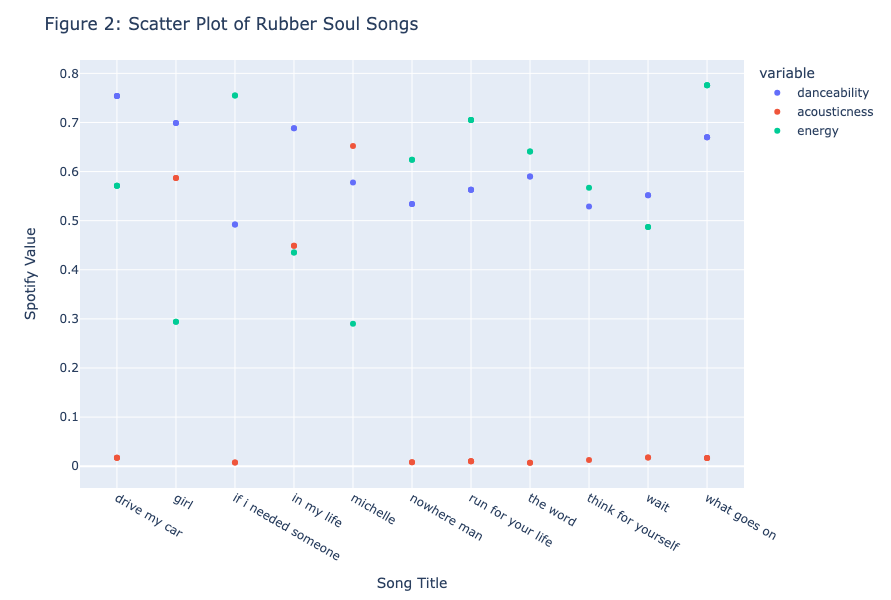

In [108]:
# now a scatter plot to show selected features for these data

fig = px.scatter(rubber_soul, 
                 x='title', # this determines the column for the x axis
                 y=['danceability', 'acousticness', 'energy']) # this sets the categories for the points
fig.update_layout(title_text="Figure 2: Scatter Plot of Rubber Soul Songs",
                  xaxis_title="Song Title",
                  yaxis_title="Spotify Value",
                  width=800, 
                  height=600)

# Show the figure
fig.show()


In [109]:
beatles_data[['danceability', 'valence', 'mode']]

,danceability,valence,mode
0,0.364,0.175,0
1,0.364,0.175,0
2,0.364,0.175,0
3,0.590,0.797,1
4,0.590,0.797,1
...,...,...,...
294,0.335,0.223,1
295,0.698,0.724,1
296,0.698,0.724,1
297,0.698,0.724,1


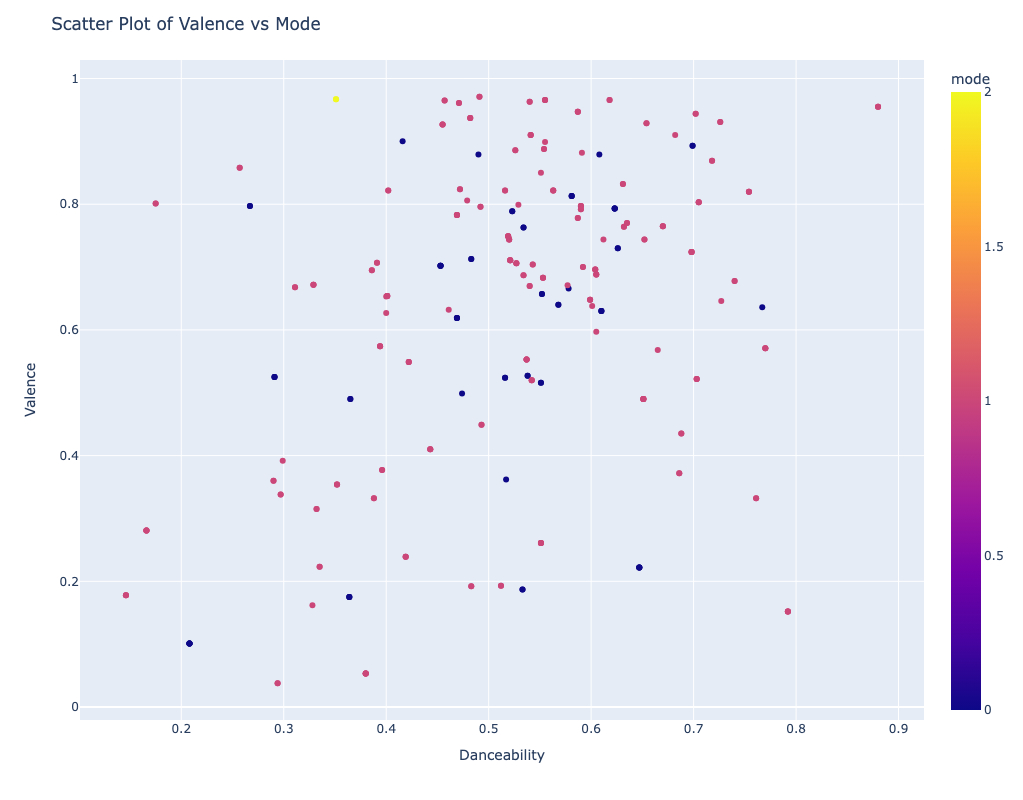

In [110]:
# Create scatter plot with trend lines
fig = px.scatter(beatles_data, 
                x='danceability', 
                y='valence',
                color='mode',
                hover_data=['title', 'album'])
                # trend_line='ols',)

# Customize the layout
fig.update_layout(
    title='Correlation between Danceability and Valence',
    xaxis_title='Danceability',
    yaxis_title='Valence'
)

fig.update_layout(title_text="Scatter Plot of Valence vs Mode",  
                  width=800, 
                  height=800)

# Show the plot
fig.show()

## 5e. Spotify Categorical Data Barchart

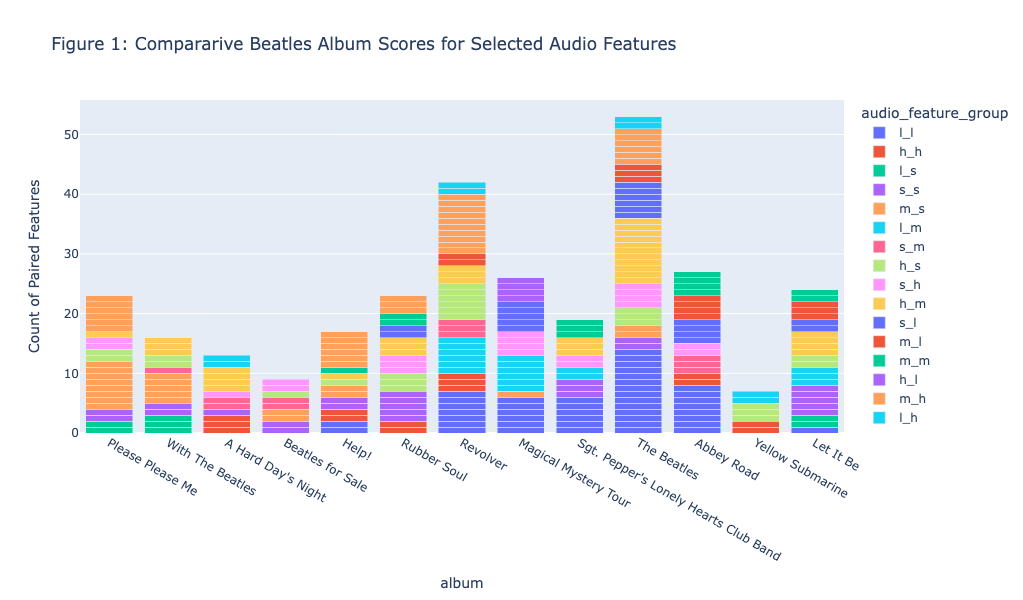

In [111]:
# here we use the 'binned' categorical data from above

album_order_by_year = ['Please Please Me', 'With The Beatles', "A Hard Day's Night",
       'Beatles for Sale', 'Help!', 'Rubber Soul', 'Revolver',
       'Magical Mystery Tour', "Sgt. Pepper's Lonely Hearts Club Band",
       'The Beatles', 'Abbey Road', 'Yellow Submarine',
       'Let It Be']

fig = px.bar(beatles_data,
             x='album',
             y='song_count',
             color='audio_feature_group',
             hover_data=['title'],
             title='Figure 1: Compararive Beatles Album Scores for Selected Audio Features',
            category_orders={'album': album_order_by_year})

# Update layout for better visualization
fig.update_layout(barmode='stack',
                yaxis_title="Count of Paired Features",
                  width=800, 
                  height=600)


# Show the figure
fig.show()

## 5f. Spotify Data as Radar Plots


In [112]:
# define radar plot function

def audio_feature_radar(audio_feature_data, feature_list, chart_title):
    melted_data = pd.melt(audio_feature_data, id_vars=['title'], value_vars=feature_list)
    closed_data = melted_data.copy()
    closed_data.loc[len(closed_data)] = closed_data.iloc[0]
    closed_data = closed_data.sort_values(['title', 'variable'])
    fig = px.line_polar(closed_data, 
                        r='value', 
                        theta='variable', 
                        color='title', 
                        labels={'title': "Track Title"},
                        line_close=True)  # Add this line
    
    fig.update_layout(title=chart_title)
    
    return fig  

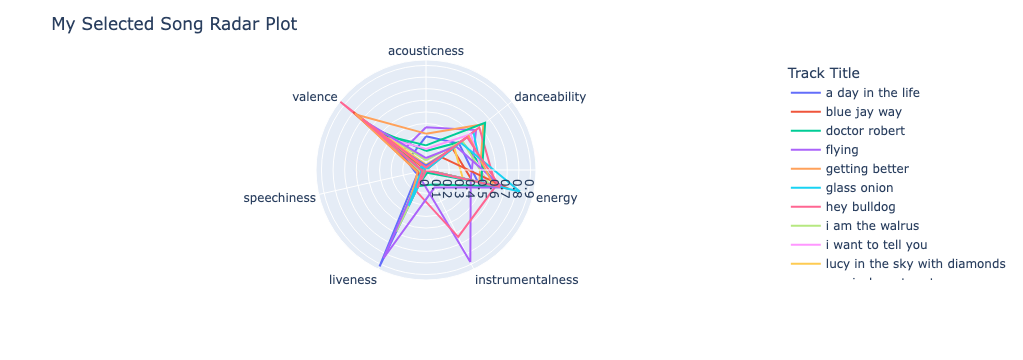

In [113]:
# these can be adjusted
feature_list = ["danceability", "energy", "speechiness", "liveness", "acousticness", "valence", 'instrumentalness']

# one album
rubber_soul = beatles_data[beatles_data['album'] == 'Rubber Soul']

# a genre
psychedelic_rock_pop = beatles_data[beatles_data['genre'].isin(['psychedelic rock', 'psychedlic pop'])].reset_index().copy()

# note that we must 'pass' the correct df to this function
# note that we can change the title
audio_feature_radar(psychedelic_rock_pop, feature_list, "My Selected Song Radar Plot")

## 5g.  Networks of Related Songs

* Networks consist of 'nodes' and 'edges'.
* Networks tell us about the relationships among entities.
* The visualization software automatically puts node with the most connections at the 'center' of a community.
* And in our case it also uses special algorithms to suggest 'communities' of highly related nodes.  These are marked with distinctive colors.

Read more in [Encoding Music Tutorials](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/09_Pandas_Networks.md)

In [114]:
# let's focus on 1966 and 1967--which were pivotal years for the Beatles!

# here we also focus on TWO sets of binned Spotify Features:  valence and acousticness

df = beatles_data[(beatles_data['year'] >= 1966) & (beatles_data['year'] <= 1967)].copy()

# set graph options:
graph_name = 'my_network.html'
graph_height = 800
graph_width = 800
detect_louvain_communities = True
add_forceAtlas2Based_physics = True
minimum_count_for_pair = 1 # minumum number of features to match

# select column for nodes
column_for_list_of_edges = 'title' # <-- for the nodes.  Your df might use a different name for this!


# select the binned features for the edges.  Could be ANY number of them, but be sure to use the 'qb' columns~
features = ['acousticness_binned', 'valence_binned']

# define pair and edge lists
edge_pair_dfs = []

# group function, which iterates through the selected feature(s)
for feature_to_groupby in features: 
    all_pairs = []

    # Group by 'feature_to_groupby' and extract a 'column_for_list_of_edges'
    grouped_feature_with_edges = df.groupby(feature_to_groupby, observed=True)[column_for_list_of_edges].unique().reset_index(name=column_for_list_of_edges)
    
    # Generate all pairs edges for each group
    for _, row in grouped_feature_with_edges.iterrows():
        pairs = list(combinations(row[column_for_list_of_edges], 2))
        all_pairs.append((row[feature_to_groupby], pairs))

    # Create a new DataFrame with the results
    edge_pair_name = column_for_list_of_edges + "_Pairs"
    edge_pair_df = pd.DataFrame(all_pairs, columns=[feature_to_groupby, edge_pair_name])
    # adjust for a threshold of genres per piece. should be > 0 
    edge_pair_df_filtered = edge_pair_df[edge_pair_df[edge_pair_name].apply(len) > 0]
    edge_pair_dfs.append(edge_pair_df_filtered)

edge_pair_df_filtered = pd.concat(edge_pair_dfs)
# explode the edge pair df
exploded_edge_pairs = edge_pair_df_filtered.explode(edge_pair_name)

# get the pair counts
pair_counts = exploded_edge_pairs[edge_pair_name].value_counts()

# filter according to threshold set above
pair_counts_filtered = pair_counts[pair_counts >= minimum_count_for_pair]


# Create an empty NetworkX graph
G = nx.Graph()

# Add nodes and assign weights to edges
for pair, count in pair_counts_filtered.items():
    # Directly unpacking the tuple into node1 and node2
    node1, node2 = pair
    # Adding nodes if they don't exist already
    if node1 not in G.nodes:
        G.add_node(node1)
    if node2 not in G.nodes:
        G.add_node(node2)
    # Adding edge with weight
    G.add_edge(node1, node2, weight=count)

# Adjusting edge thickness based on weights
for edge in G.edges(data=True):
    edge[2]['width'] = edge[2]['weight']
    
# Adding Louvain Communities
if detect_louvain_communities == True:
    def add_communities(G):
        G = deepcopy(G)
        partition = community_louvain.best_partition(G)
        nx.set_node_attributes(G, partition, "group")
        return G      
    G = add_communities(G)

# set display parameters
network_graph = net.Network(notebook=True,
                   width=graph_height,
                   height=graph_height,
                   bgcolor="black", 
                   font_color="white")

# Set the physics layout of the network
if add_forceAtlas2Based_physics == True:
    network_graph.set_options("""
    {
    "physics": {
    "enabled": true,
    "forceAtlas2Based": {
        "springLength": 1
    },
    "solver": "forceAtlas2Based"
    }
    }
    """)

network_graph.from_nx(G)
# # return the network
network_graph.show(graph_name)

# 6. Interpretation

* What did you learn from the results? How were your expectations confirmed (or not)?

* What limitations did the data or your methods impose on your capacity to answer the questions you originally posed?

* How do your results change your views of the readings or ideas that motivated your work it the first place? 

* How do your results shape your listening experience of the music you considered? 

* What next steps do you imagine for future work?